In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

Load data

In [2]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [3]:
features_response = df.columns.tolist()

In [5]:
features_response

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month',
 'EDUCATION_CAT',
 'graduate school',
 'high school',
 'others',
 'university']

In [6]:
items_to_remove = ['ID', 'SEX',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT',
                   'graduate school', 'high school', 'none',
                   'others', 'university']

In [7]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


# Exercise 12: Visualizing the Relationship Between Features and Response

In [9]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [10]:
group_by_pay_mean_y = df.groupby('PAY_1').agg(
    {'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


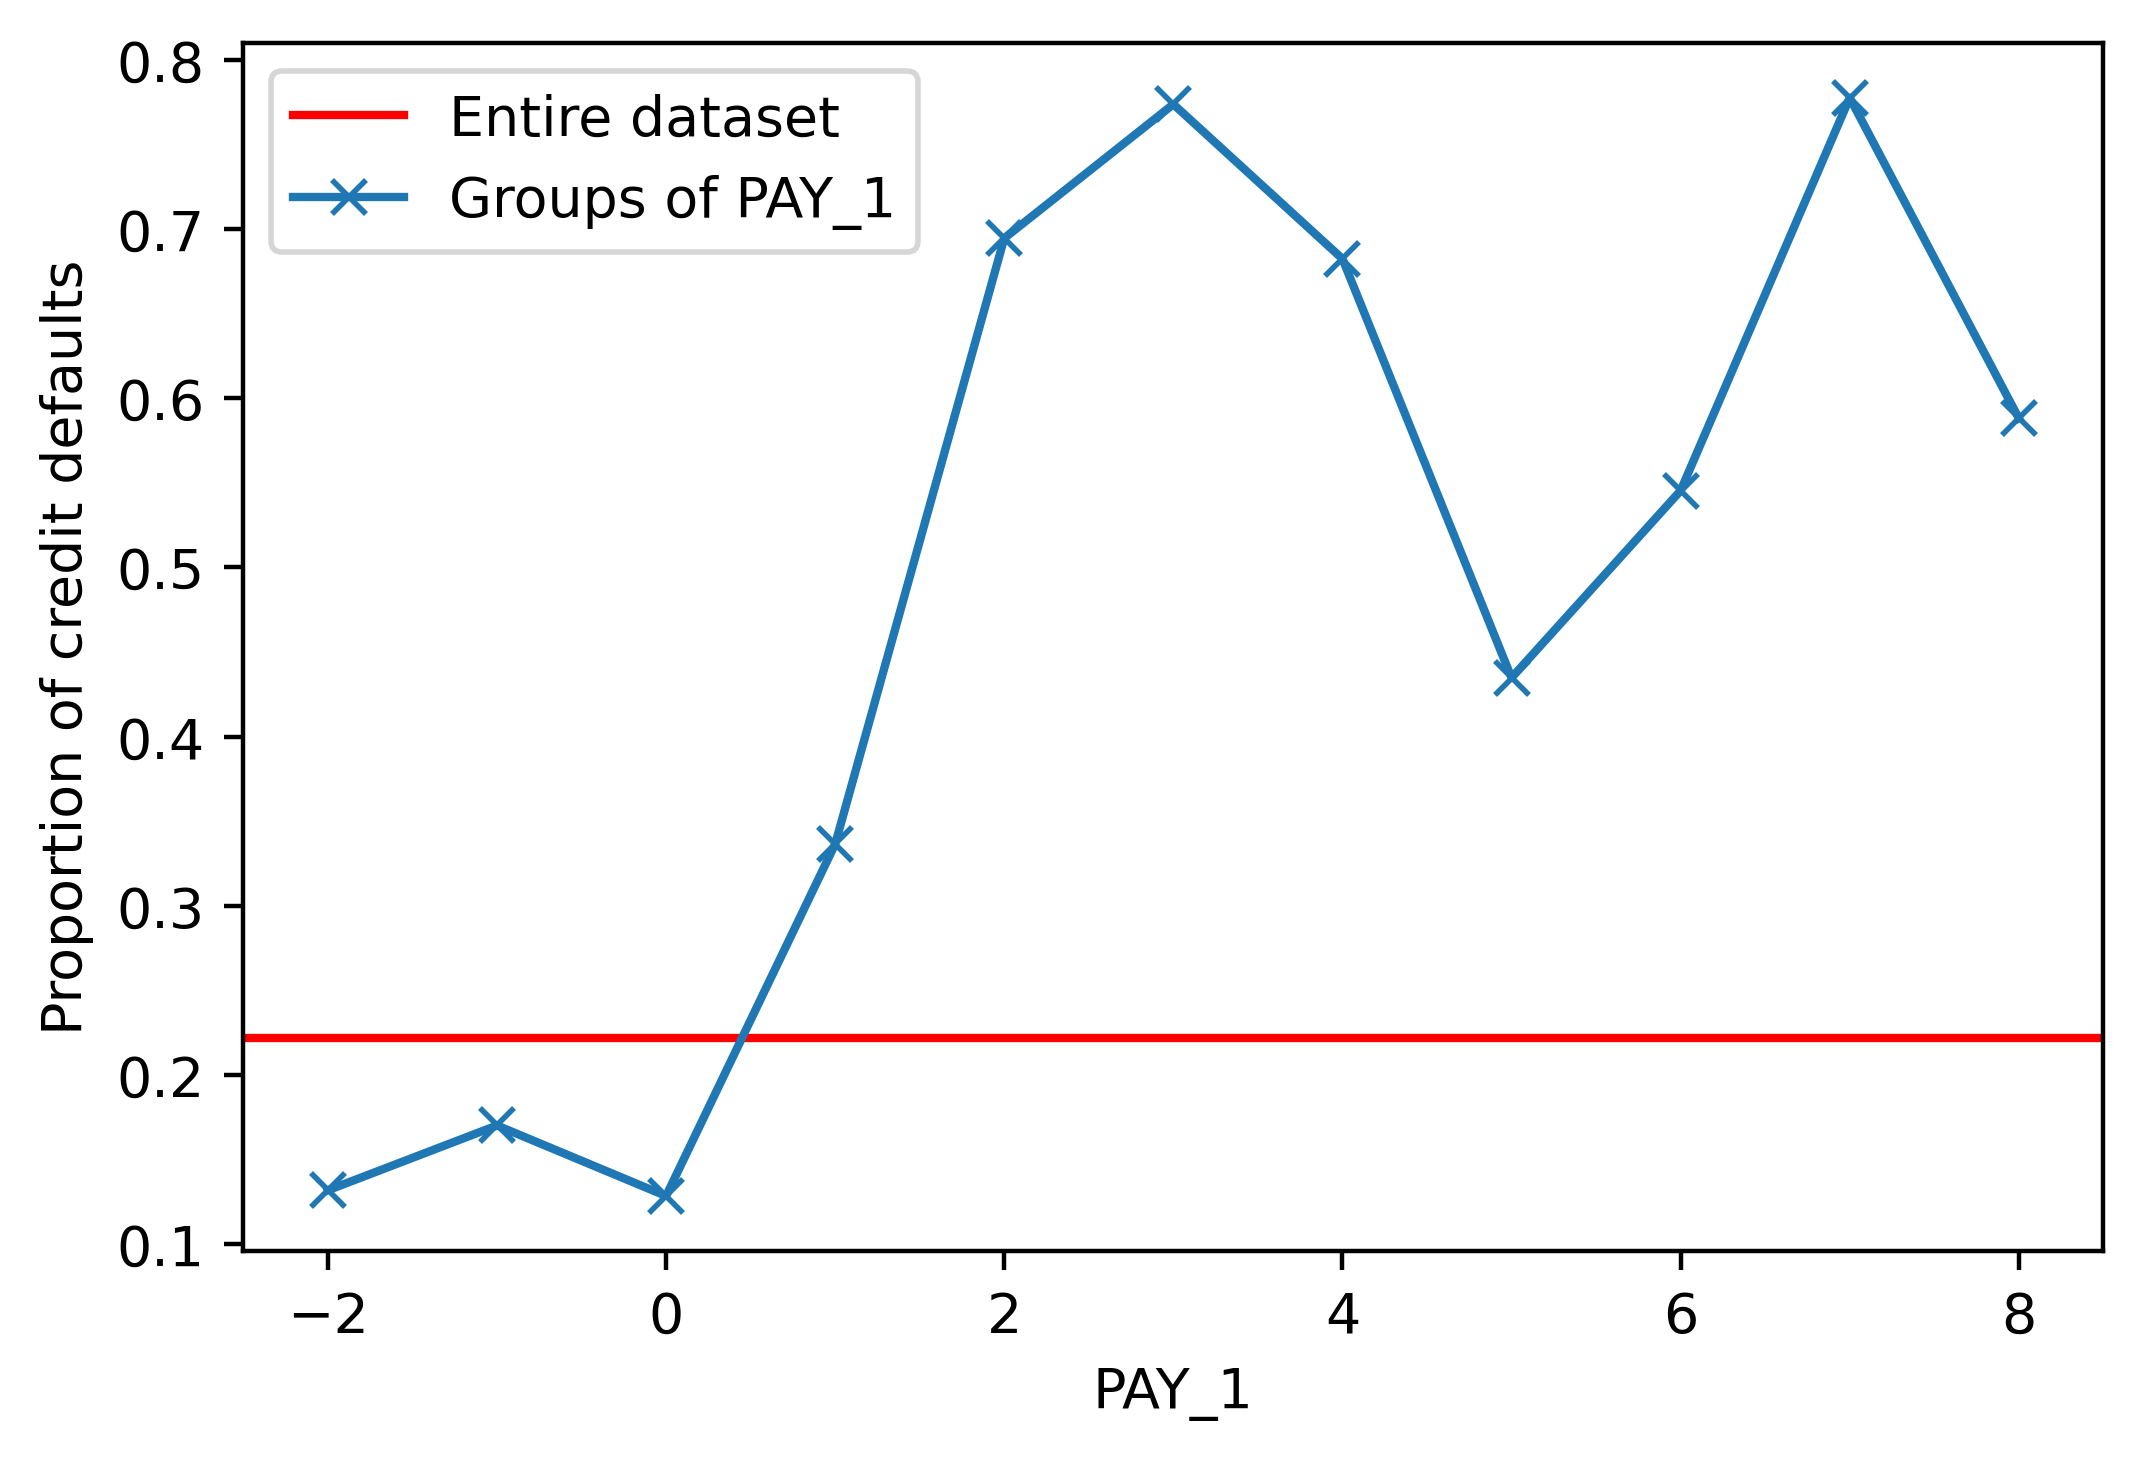

In [11]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [12]:
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

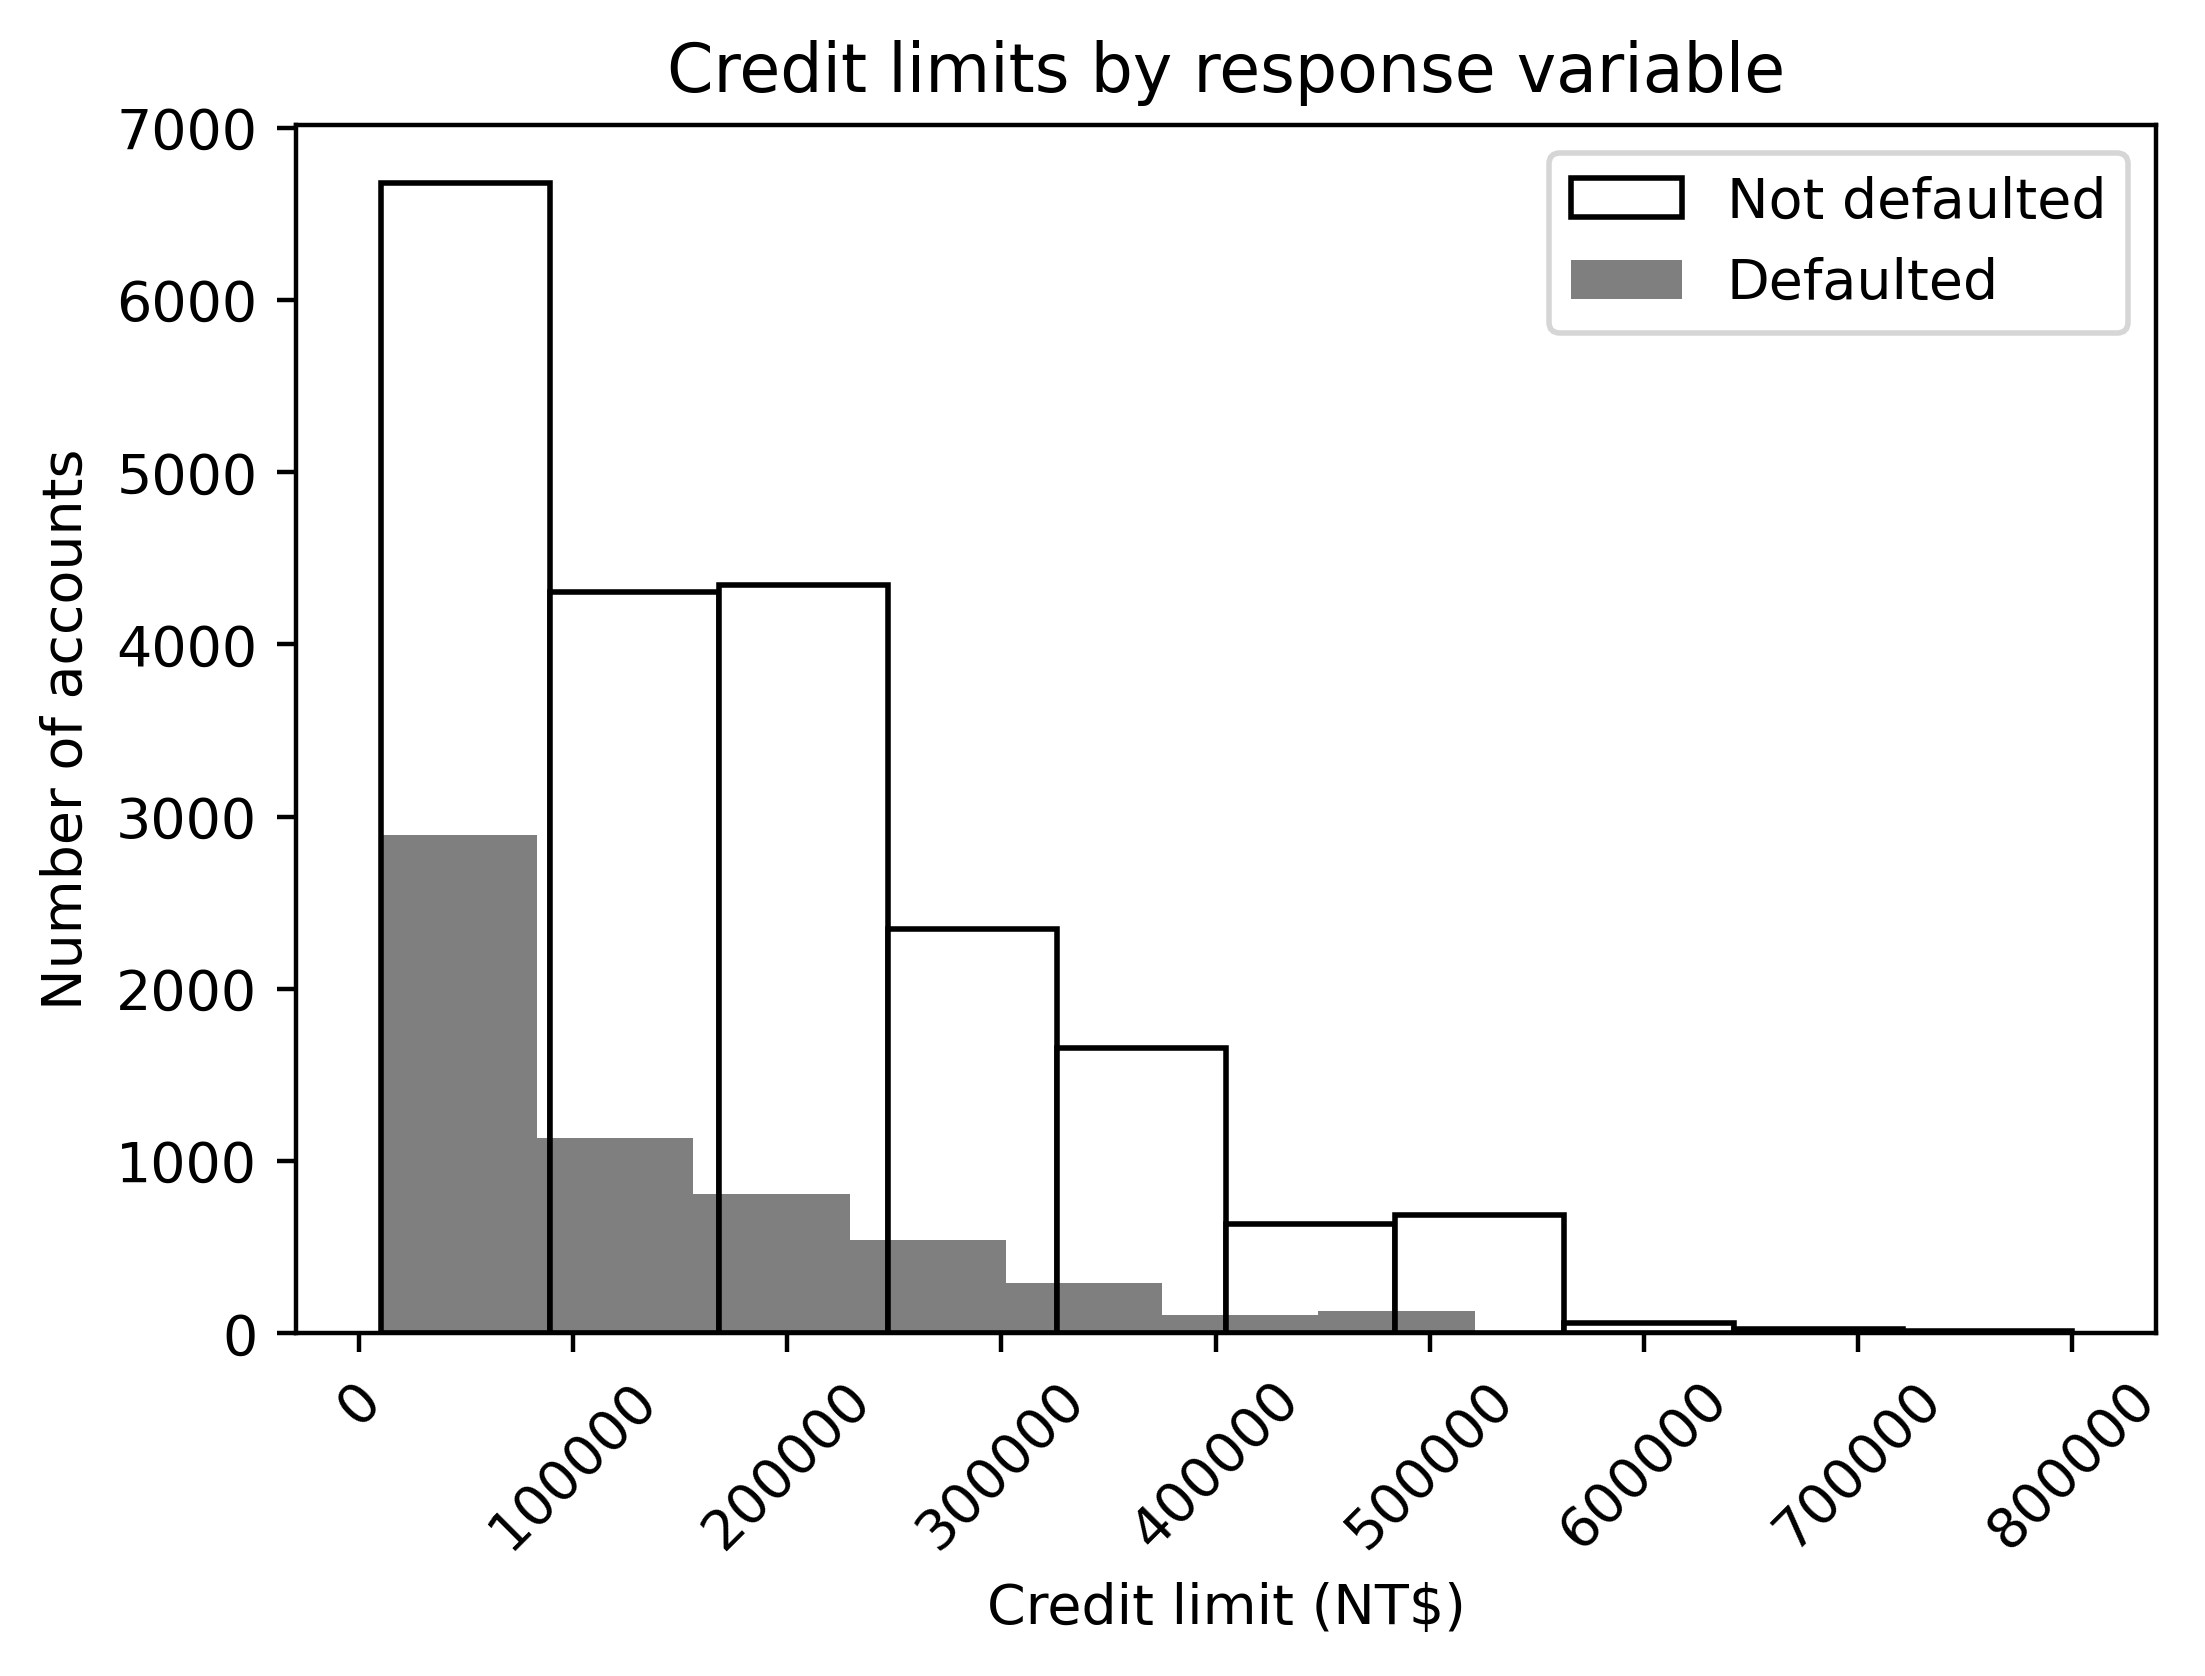

In [13]:
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'],
          edgecolor='black', color='white')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'],
          alpha=0.5, edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [14]:
df['LIMIT_BAL'].max()

800000

In [15]:
bin_edges = list(range(0,850000,50000))
print(bin_edges)

[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 800000]


<ipython-input-16-58af298f658f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

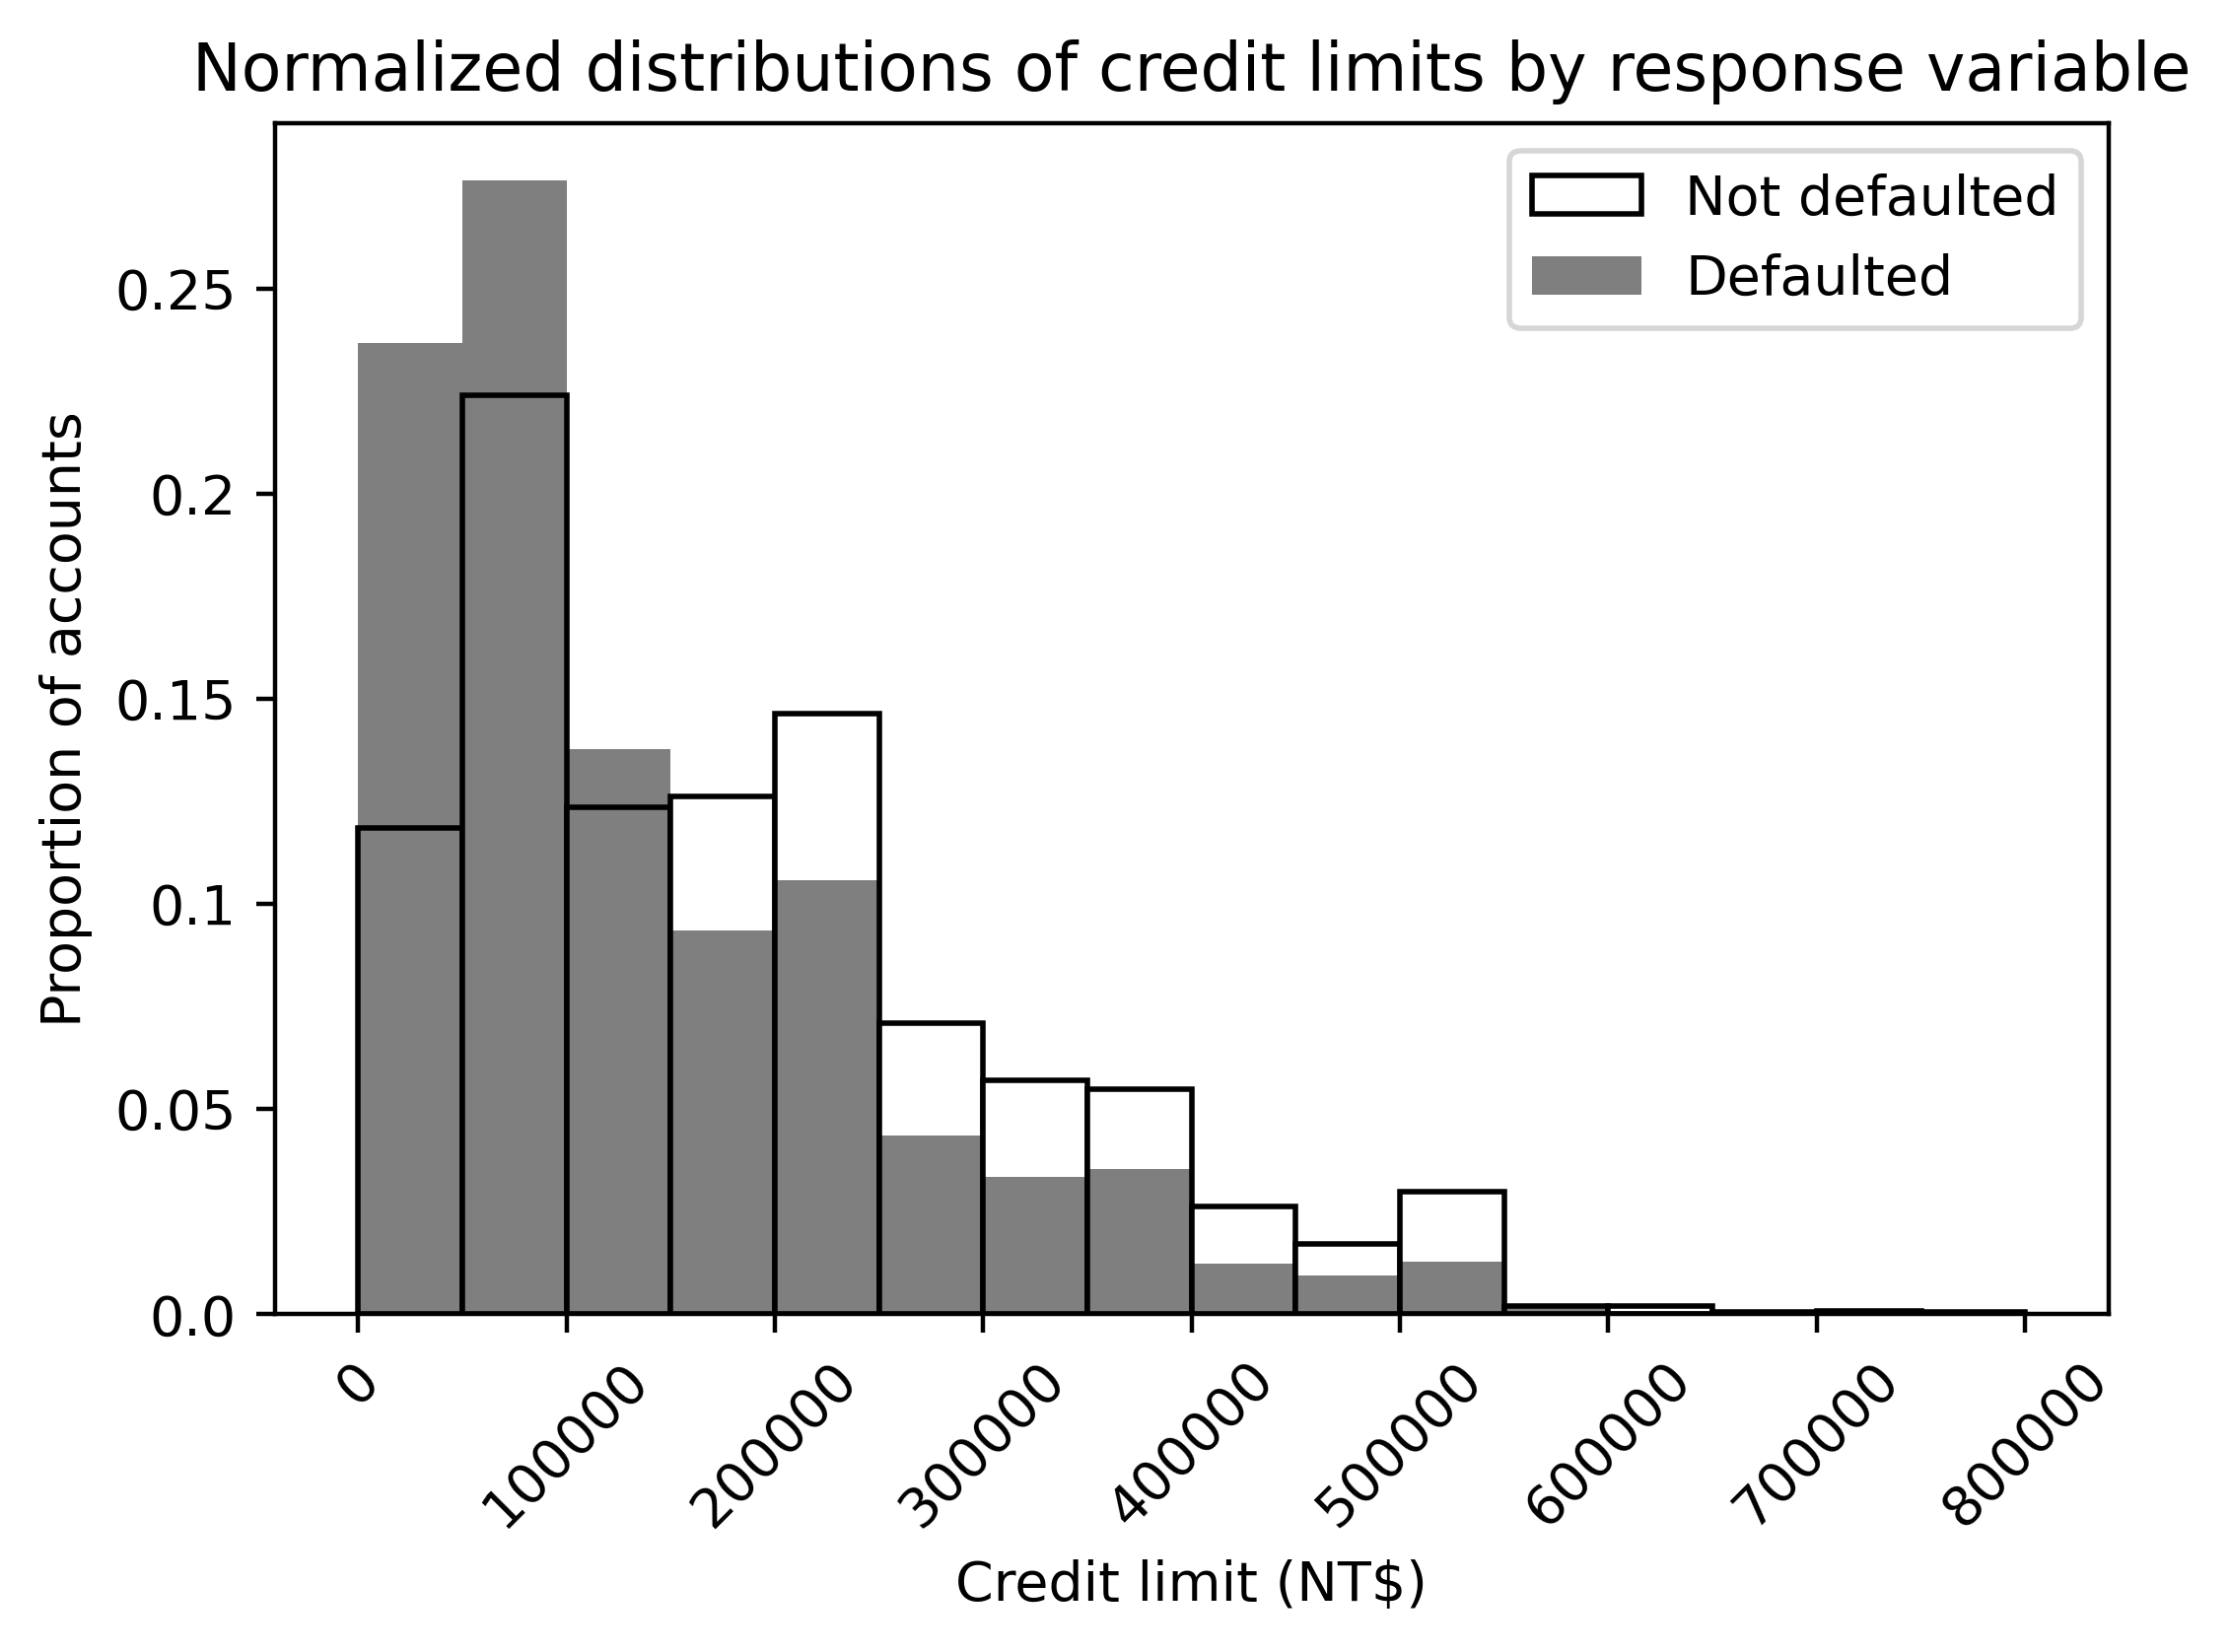

In [16]:
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(
    df.loc[neg_mask, 'LIMIT_BAL'],
    bins=bin_edges, density=True,
    edgecolor='black', color='white')
axes.hist(
    df.loc[pos_mask, 'LIMIT_BAL'],
    bins=bin_edges, density=True, alpha=0.5,
    edgecolor=None, color='black')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title(
    'Normalized distributions of credit limits by response variable')